In [325]:
 import math
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [326]:
X = (np.load("../BIO_Ml/GSE52588/GSE52588_beta_fn.npz"))["X"]
data = pd.read_csv("../BIO_Ml/GSE52588/GSE52588_samples.csv", delim_whitespace=True)
names = pd.read_csv("../BIO_Ml/GSE52588/cpgs_annotations.csv")
#names = pd.read_table("../BIO_Ml/GSE52588/cpgs_annotations.csv", delim_whitespace=True)
#names = names["UCSC_REFGENE_NAME"]
#names = names.replace(np.nan, "0")

0                    RBL2
1         C3orf35;C3orf35
2           FNDC3B;FNDC3B
3                       0
4             VDAC3;VDAC3
               ...       
485572                  0
485573                  0
485574                  0
485575                  0
485576                  0
Name: UCSC_REFGENE_NAME, Length: 485577, dtype: object


In [327]:
y = data["age"]
y = y.to_numpy()
X = Normalizer().fit_transform(X)

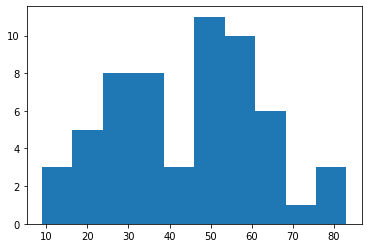

In [328]:
y = y[29:]
X = X[29:]
plt.hist(y)
plt.show()


In [329]:
test1 = SelectKBest(score_func=chi2, k = 10000)
fit = test1.fit(X, y)
X = fit.transform(X)

In [330]:
selector = RandomForestRegressor(n_estimators=30, criterion="squared_error", random_state= 42)
model = selector.fit(X, y)
importances = model.feature_importances_

important_features = []
for i in range(len(importances)):
    important_features.append(list(importances).index(importances[i])) if importances[i] > 0 else 0
X = X[..., important_features]

#names = names[important_features]
#names = names.drop_duplicates()
#print(names)
#names.to_excel("../BIO_Ml/GSE52588/gene_names_CpG_based.xlsx")

33                        0
78                     LHX5
138     TCTE3;C6orf70;TCTE3
143                 MTHFD2L
163                  ZNF362
               ...         
9931                  DOCK6
9933                   SMC3
9989    FLRT3;MACROD2;FLRT3
9992            DUOX1;DUOX1
9996                   TAC3
Name: UCSC_REFGENE_NAME, Length: 530, dtype: object


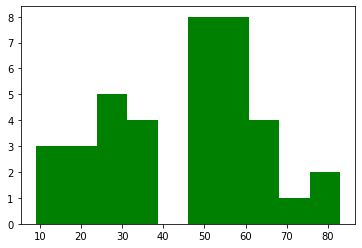

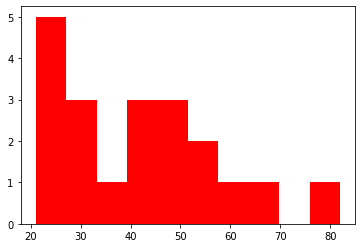

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plt.hist(y_train, color='g')
plt.show()
plt.hist(y_test, color= "r")
plt.show()

In [332]:
regressor = RandomForestRegressor(n_estimators=42, criterion="absolute_error", random_state= 42)
#regressor = LinearRegression()
#regressor = SVR(kernel="poly", C = 1.5)
model = regressor.fit(X_train, y_train)

In [333]:
y_pred = regressor.predict(X_test)
res = pd.DataFrame({"Actual": y_test, "Predicted": y_pred,
                    "AE": y_test - y_pred,
                    "SE": (y_test - y_pred)**2})
print("MAE: ", mean_absolute_error(y_test, y_pred), "MSE: ", mean_squared_error(y_test, y_pred))
print(res)

MAE:  4.104761904761905 MSE:  30.91893424036282
    Actual  Predicted         AE          SE
0       21  25.880952  -4.880952   23.823696
1       24  24.642857  -0.642857    0.413265
2       56  59.928571  -3.928571   15.433673
3       36  33.714286   2.285714    5.224490
4       46  46.809524  -0.809524    0.655329
5       61  60.809524   0.190476    0.036281
6       64  57.571429   6.428571   41.326531
7       33  28.833333   4.166667   17.361111
8       45  43.166667   1.833333    3.361111
9       32  31.571429   0.428571    0.183673
10      82  66.071429  15.928571  253.719388
11      21  24.023810  -3.023810    9.143424
12      51  55.642857  -4.642857   21.556122
13      42  50.380952  -8.380952   70.240363
14      33  28.214286   4.785714   22.903061
15      24  24.904762  -0.904762    0.818594
16      25  28.166667  -3.166667   10.027778
17      42  44.476190  -2.476190    6.131519
18      56  53.214286   2.785714    7.760204
19      48  58.404762 -10.404762  108.259070


C:\Users\Eugen\AppData\Local\Temp/ipykernel_3192/3201256746.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(y_pred,"bo-", c= "r")
C:\Users\Eugen\AppData\Local\Temp/ipykernel_3192/3201256746.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(y_test,"bo-", c= "g")


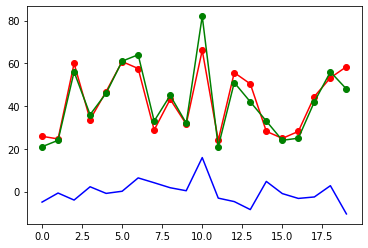

In [334]:
plt.plot(y_pred,"bo-", c= "r")
plt.plot(y_test,"bo-", c= "g")
plt.plot(y_test-y_pred, c= "b")
plt.show()